# 7:3 Train/Test Ratio

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#read data
df = pd.read_csv('VCB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,11929.0,11885.0,11929.0,11797.0,1.60M,0.01
1,24/12/2013,11841.0,11885.0,11885.0,11753.0,2.20M,-0.01
2,25/12/2013,11797.0,11841.0,11841.0,11709.0,1.19M,0.00
3,26/12/2013,11885.0,11797.0,11885.0,11753.0,1.23M,0.01
4,27/12/2013,11797.0,11885.0,11929.0,11797.0,1.19M,-0.01
...,...,...,...,...,...,...,...
2491,18/12/2023,81500.0,82800.0,82900.0,81500.0,1.80M,-0.01
2492,19/12/2023,81200.0,81500.0,81500.0,80100.0,1.96M,0.00
2493,20/12/2023,81100.0,81200.0,81300.0,80500.0,1.87M,0.00
2494,21/12/2023,80900.0,81000.0,81000.0,80300.0,2.03M,0.00


In [3]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = (df[:train_size])
test_data = df[train_size:]

In [4]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28105.966, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28107.772, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28109.768, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28109.773, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28109.807, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28109.695, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28109.945, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=28107.741, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28107.835, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28111.755, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28111.558, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=28111.928, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=28103.785, Time=1.72 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=28105.950, Time=1.91 sec
 ARIMA(3,1,4)(0,0,0

In [5]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [6]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[102377.22489386 102413.16126407 102449.11881102 102485.0421368
 102520.99268955 102556.93854099 102592.86439136 102628.82282866
 102664.75517874 102700.69223024 102736.64816992 102772.57308037
 102808.52298413 102844.46819689 102880.39557488 102916.35249739
 102952.28547641 102988.22312644 103024.17761428 103060.10397263
 103096.05326709 103131.99791914 103167.92667686 103203.88221548
 103239.81578459 103275.75395973 103311.70713643 103347.63481742
 103383.58354056 103419.52770103]


In [7]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 9723.2792431757
MAPE: 9.890512936216494
MSLE: 0.013098288145852819


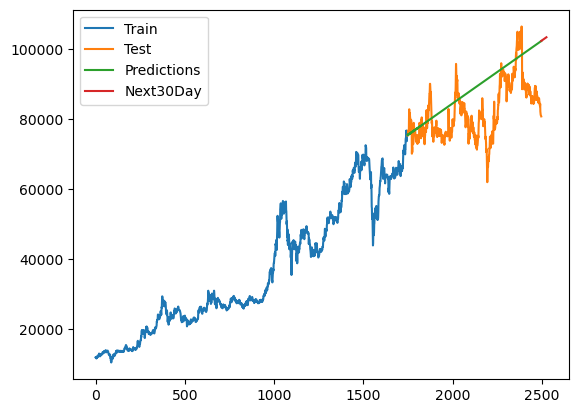

In [8]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [9]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1747
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -14043.892
Date:                Sat, 30 Dec 2023   AIC                          28103.785
Time:                        11:04:50   BIC                          28147.505
Sample:                             0   HQIC                         28119.949
                               - 1747                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.2885     30.668      1.151      0.250     -24.819      95.396
ar.L1         -0.6906      0.205     -3.372      0.001      -1.092      -0.289
ar.L2          0.0164      0.286      0.057      0.9

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1747
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -14043.892
Date:                Sat, 30 Dec 2023   AIC                          28103.785
Time:                        11:04:51   BIC                          28147.505
Sample:                             0   HQIC                         28119.949
                               - 1747                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.2885     30.668      1.151      0.250     -24.819      95.396
ar.L1         -0.6906      0.205     -3.372      0.001      -1.092      -0.289
ar.L2          0.0164      0.286      0.057      0.954      -0.545       0.577
ar.L3          0.6924      0.201      3.451      0.001       0.299       1.086
ma.L1          0.6963      0.213      3.267      0.001       0.279       1.114
ma.L2          0.0196      0.294      0.067      0.947      -0.556       0.595
ma.L3         -0.6590      0.206     -3.196      0.001      -1.063      -0.255
sigma2      5.743e+05   1.12e+04     51.482      0.000    5.52e+05    5.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1688.56
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.63   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 8:2 Train/Test Ratio

In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [12]:
#read data
df = pd.read_csv('VCB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,11929.0,11885.0,11929.0,11797.0,1.60M,0.01
1,24/12/2013,11841.0,11885.0,11885.0,11753.0,2.20M,-0.01
2,25/12/2013,11797.0,11841.0,11841.0,11709.0,1.19M,0.00
3,26/12/2013,11885.0,11797.0,11885.0,11753.0,1.23M,0.01
4,27/12/2013,11797.0,11885.0,11929.0,11797.0,1.19M,-0.01
...,...,...,...,...,...,...,...
2491,18/12/2023,81500.0,82800.0,82900.0,81500.0,1.80M,-0.01
2492,19/12/2023,81200.0,81500.0,81500.0,80100.0,1.96M,0.00
2493,20/12/2023,81100.0,81200.0,81300.0,80500.0,1.87M,0.00
2494,21/12/2023,80900.0,81000.0,81000.0,80300.0,2.03M,0.00


In [13]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [14]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32631.572, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32645.167, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32647.135, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32647.141, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32645.998, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32645.757, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32646.274, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32628.978, Time=1.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32642.857, Time=0.37 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=32630.976, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32630.841, Time=1.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32628.928, Time=1.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32642.254, Time=0.37 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=32630.958, Time=1.26 sec
 ARIMA(1,1,4)(0,0,0

In [15]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [16]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88506.40422403 88529.91743181 88553.43063959 88576.94384738
 88600.45705516 88623.97026294 88647.48347072 88670.99667851
 88694.50988629 88718.02309407 88741.53630185 88765.04950964
 88788.56271742 88812.0759252  88835.58913298 88859.10234076
 88882.61554855 88906.12875633 88929.64196411 88953.15517189
 88976.66837968 89000.18158746 89023.69479524 89047.20800302
 89070.72121081 89094.23441859 89117.74762637 89141.26083415
 89164.77404194 89188.28724972]


In [17]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 7467.380381034229
MAPE: 6.8537302616172715
MSLE: 0.007692367298542807


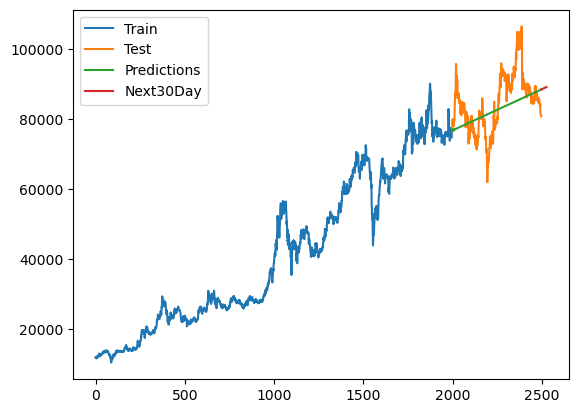

In [18]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# 9:1 Train/Test Ratio

In [19]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [20]:
#read data
df = pd.read_csv('VCB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,11929.0,11885.0,11929.0,11797.0,1.60M,0.01
1,24/12/2013,11841.0,11885.0,11885.0,11753.0,2.20M,-0.01
2,25/12/2013,11797.0,11841.0,11841.0,11709.0,1.19M,0.00
3,26/12/2013,11885.0,11797.0,11885.0,11753.0,1.23M,0.01
4,27/12/2013,11797.0,11885.0,11929.0,11797.0,1.19M,-0.01
...,...,...,...,...,...,...,...
2491,18/12/2023,81500.0,82800.0,82900.0,81500.0,1.80M,-0.01
2492,19/12/2023,81200.0,81500.0,81500.0,80100.0,1.96M,0.00
2493,20/12/2023,81100.0,81200.0,81300.0,80500.0,1.87M,0.00
2494,21/12/2023,80900.0,81000.0,81000.0,80300.0,2.03M,0.00


In [21]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [22]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=37150.747, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=37151.513, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37151.525, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37150.996, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=37153.515, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.871 seconds


In [23]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [24]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[86832.34788419 86862.35723831 86892.36659243 86922.37594655
 86952.38530067 86982.39465479 87012.40400891 87042.41336303
 87072.42271715 87102.43207127 87132.44142539 87162.45077951
 87192.46013363 87222.46948775 87252.47884187 87282.48819599
 87312.49755011 87342.50690423 87372.51625835 87402.52561247
 87432.53496659 87462.54432071 87492.55367483 87522.56302895
 87552.57238307 87582.58173719 87612.59109131 87642.60044543
 87672.60979955 87702.61915367]


In [25]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 9968.43855986711
MAPE: 8.484011659802656
MSLE: 0.012453676425048549


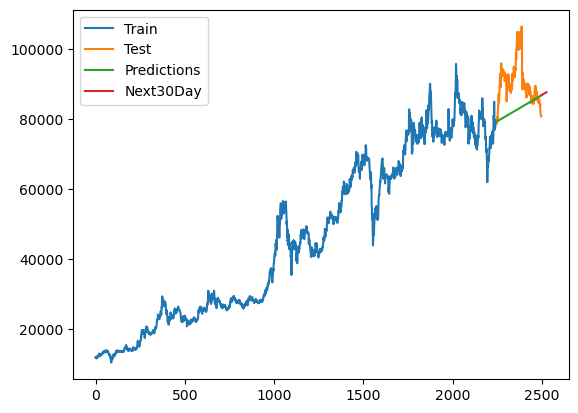

In [26]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()